Average number of mouths indirectly kissed: 53.6332
Probability of contracting the disease: 0.9393


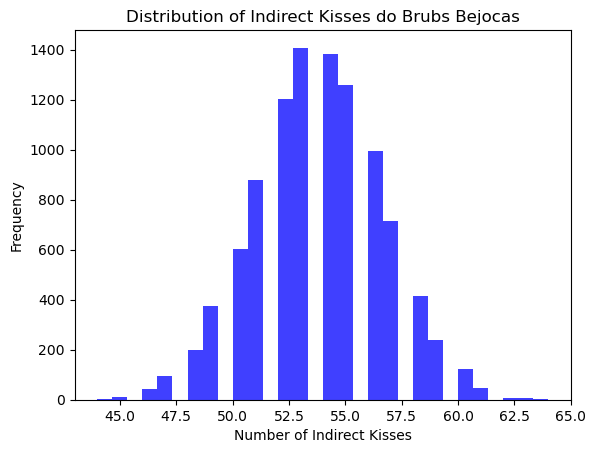

In [4]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
N = 100  # Total number of people at the party
k = 5    # Average number of people each kissed girl kisses
p = 0.05  # Probability a person has a disease
num_simulations = 10000  # Number of simulations for better accuracy

def simulate_kisses(N, k, p):
    # Initialize counts
    indirectly_kissed = set()
    disease_carriers = set()
    
    # Your friend kissed 15 girls
    initial_kissed = np.random.choice(range(N), 15, replace=False)
    
    # Each girl kisses k other random people
    for girl in initial_kissed:
        others_kissed = np.random.choice(range(N), k, replace=False)
        indirectly_kissed.update(others_kissed)
    
    # Probability of having a disease among those kissed
    for person in indirectly_kissed:
        if np.random.random() < p:
            disease_carriers.add(person)
    
    # Determine if your friend could be infected
    infected = len(disease_carriers) > 0
    
    return len(indirectly_kissed), infected

# Run multiple simulations
indirect_kisses = []
infection_risk = []

for _ in range(num_simulations):
    ik, ir = simulate_kisses(N, k, p)
    indirect_kisses.append(ik)
    infection_risk.append(ir)

# Calculate results
avg_indirect_kisses = np.mean(indirect_kisses)
infection_probability = np.mean(infection_risk)

print(f"Average number of mouths indirectly kissed: {avg_indirect_kisses}")
print(f"Probability of contracting the disease: {infection_probability}")

# Plot the distribution of indirect kisses
plt.hist(indirect_kisses, bins=30, alpha=0.75, color='blue')
plt.title('Distribution of Indirect Kisses')
plt.xlabel('Number of Indirect Kisses')
plt.ylabel('Frequency')
plt.show()